In [1]:
from nilearn import plotting
from nilearn.image import resample_img, mean_img,smooth_img
from nilearn import datasets
from nilearn.regions import RegionExtractor
from nilearn import image
import nibabel as nib
from nipype.interfaces import fsl
from nipype.interfaces.ants import N4BiasFieldCorrection, RegistrationSynQuick
from lib.zscore_norm import zscore_normalize
import numpy as np


atlas_folder = "G:/StrokeResearch/vascular territory template/"
data_test_folder = 'G:/StrokeResearch/vascular territory template/testcase/'
atl = atlas_folder+'mni_vascular_territories.nii.gz'


In [3]:
mni_terr = nib.load(atl)
print(mni_terr.shape)

(182, 218, 182)


In [4]:
test_img_1 = nib.load(data_test_folder+'PWI_1.nii.gz')
print(test_img_1.shape)

(207, 256, 26, 50)


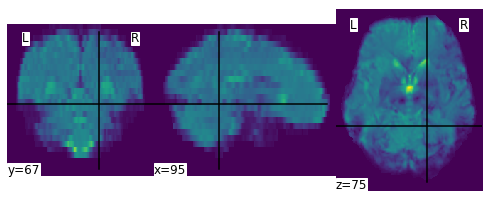

In [5]:
smooth_anat_img = smooth_img(test_img_1,fwhm=3)
plotting.plot_img(test_img_1.slicer[:,:,:,25],cut_coords=(95,67,75))

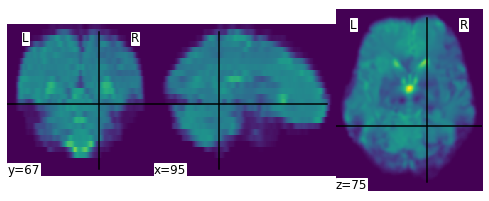

In [40]:
plotting.plot_img(smooth_anat_img.slicer[:,:,:,25],cut_coords=(95,67,75))

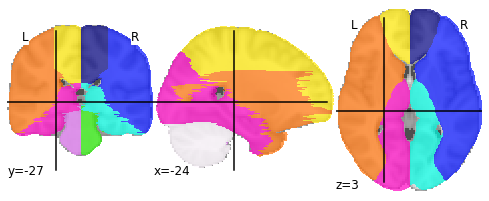

In [50]:
plotting.plot_roi(mni_terr)

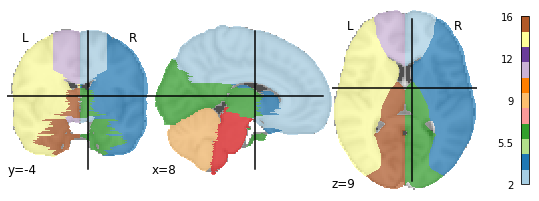

In [20]:
plotting.plot_roi(mni_terr,cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

In [21]:
atlas_region_coords = plotting.find_parcellation_cut_coords(mni_terr) 

c:\users\harry\anaconda3\envs\stroke_preprocessing\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


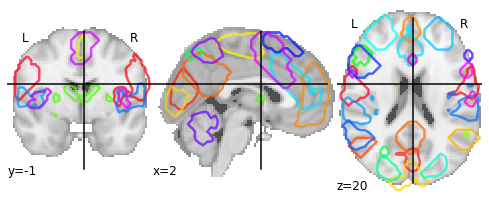

In [83]:
plotting.plot_prob_atlas(msdl)

In [68]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
msdl = nib.load(atlas_filename)
msdl.shape

c:\users\harry\anaconda3\envs\stroke_preprocessing\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


(40, 48, 35, 39)

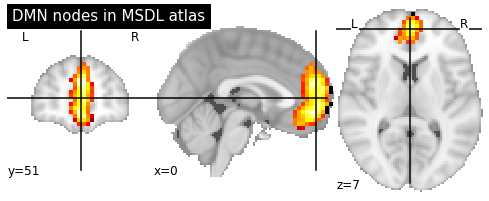

In [74]:
plotting.plot_stat_map(image.index_img(atlas_filename, 5),
                                 colorbar=False,
                                 title="DMN nodes in MSDL atlas")

In [6]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels
ho = nib.load(atlas_filename)
ho.shape

(91, 109, 91)

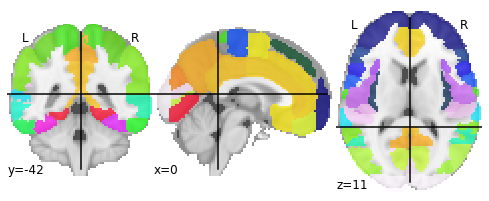

In [45]:
plotting.plot_roi(ho)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See http://nilearn.github.io/manipulating_images/input_output.html.

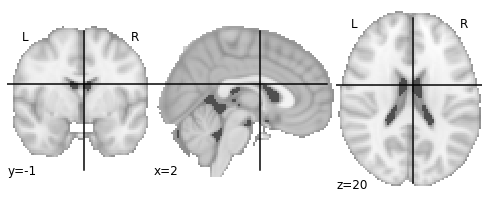

In [47]:
display = plotting.plot_prob_atlas(test_img_1.slicer[:,:,:,25])
display.add_overlay(ho)
plotting.show()

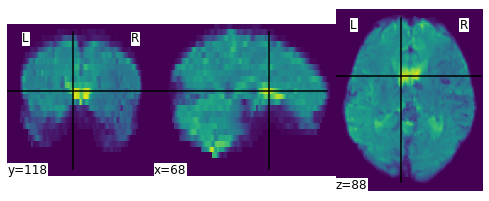

In [57]:
plotting.plot_img(test_img_1.slicer[:,:,:,25])

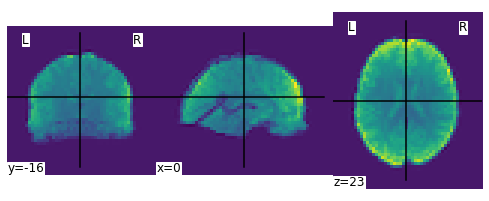

In [56]:
plotting.plot_img(data_test.slicer[:,:,:,25])

In [9]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=ho, standardize=True)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(test_img_1)

In [10]:
time_series.shape

(50, 17)

In [37]:
test_img_1.slicer[:,:,:,1]

(207, 256, 26)

In [38]:
ho.shape

(91, 109, 91)

In [51]:
data = datasets.fetch_development_fmri(n_subjects=1)

In [52]:
data_test = nib.load(data.func[0])

In [53]:
data_test.shape

(50, 59, 50, 168)

In [22]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

ValueError: Length of labels unequal to length of matrix.

In [41]:
correlation_matrix.shape

(48, 48)

In [118]:
label_terr = ['Left_ACA',
                  'Left_MCA', 
                  'Left_PCA',
                  'Left_Pons_Medulla',
                  'Left_Cerebellum',
                  'Right_ACA',
                  'Right_MCA', 
                  'Right_PCA',
                  'Right_Pons_Medulla',
                  'Right_Cerebellum',
]